In [1]:
import numpy as np
from skimage import data, io, filters
import scipy
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [769]:
from skimage import filters
import scipy.ndimage as nd

def applySobel(img, threshold):
    edges = filters.sobel(img)
    edges[edges <threshold] = 0
    edges[edges >=threshold] = 1
    return edges

def applyCanny(img,sig, upperThreshold):
    edge = feature.canny(img,sigma = sig, high_threshold = upperThreshold, low_threshold=.3*upperThreshold)
    
    return edge.astype(float)

def applyGaussianLaplace(img,sig,localThreshold):
    img = img.astype(float)
    glImg = nd.gaussian_laplace(img,sig)
    x,y=3,3
    m,n = img.shape
    newImg = np.zeros((m,n))
    for i in range(0,m-x+1):
        for j in range(0,n-y+1):
            block = glImg[i:i+x,j:j+y]
            minNo = np.min(block)
            maxNo = np.max(block)
            val = 0.0
            if((minNo*maxNo<0) and np.abs(maxNo-minNo)>=localThreshold):
                val = 1.0
            newImg[i+(x/2),j+(y/2)] = val
    return newImg
#precision = tp/(tp+fp)
#recall = tp/(tp+fn)
def precisionRecallCurve(imgGray, imgGT,sig,method):
    
    tp=0.0;
    fp=0.0;
    fn = 0.0;
    imgGTNonzeropts = np.where(imgGT>0)
    sGT = frozenset(zip(imgGTNonzeropts[0],imgGTNonzeropts[1]))
    img = np.zeros(imgGray.shape)
    precision = []
    recall = []
    threshold = 0.0
    while(1):
        print threshold
        if method=='sobel':
            img = applySobel(imgGray, threshold)
        elif method == 'glap':
            img = applyGaussianLaplace(imgGray,sig,threshold)
        else:
            img = applyCanny(imgGray,sig, threshold)
            
        imgNonzeropts = np.where(img>0)
        if(len(imgNonzeropts[0])==0):
            break
            
        sImg = frozenset(zip(imgNonzeropts[0],imgNonzeropts[1]))
        tp = float(len(sImg.intersection(sGT)))
    
        fp = float(len(sImg)-tp)
        fn = float(len(sGT) - tp)
        #print tp,' ',fp,' ',fn
        precision.append(tp/(tp+fp))
        recall.append(tp/(tp+fn))
        threshold += .001

    return (precision,recall)


def expand3px(sGT):
    ls = list(sGT)
    ls2 = list(ls)
    for pt in ls:
        ptx,pty = pt
        for i in range(-3,4):
            for j in range(-3,4):
                if( (abs(i)+abs(j))>3):
                    continue
                ls2.append((ptx+i,pty+j))
    return frozenset(ls2)

#precision = tp/(tp+fp)
#recall = tp/(tp+fn)
def precisionRecallCurve3Pixel(imgGray, imgGT,sig,method):
    
    tp=0.0;
    fp=0.0;
    fn = 0.0;
    imgGTNonzeropts = np.where(imgGT>0)
    sGT = frozenset(zip(imgGTNonzeropts[0],imgGTNonzeropts[1]))
    sGT3p = expand3px(sGT)
    img = np.zeros(imgGray.shape)
    precision = []
    recall = []
    threshold = 0.0
    while(1):
        print threshold
        if method=='sobel':
            img = applySobel(imgGray, threshold)
        elif method == 'glap':
            img = applyGaussianLaplace(imgGray,sig,threshold)
        else:
            img = applyCanny(imgGray,sig, threshold)
            
        imgNonzeropts = np.where(img>0)
        if(len(imgNonzeropts[0])==0):
            break
            
        sImg = frozenset(zip(imgNonzeropts[0],imgNonzeropts[1]))
        tp = float(len(sImg.intersection(sGT3p)))
    
        fp = float(len(sImg)-tp)
        fn = float(len(sGT) - tp)
        #print tp,' ',fp,' ',fn
        precision.append(tp/(tp+fp))
        recall.append(tp/(tp+fn))
        threshold += .001

    return (precision,recall)


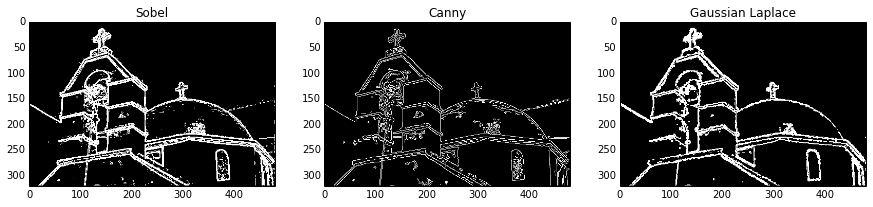

In [639]:
img1 = (io.imread('Images/Q3/Church.jpg',dtype='float64')/255.0)
imx1 = (io.imread('Images/Q3/Church_GT.bmp',dtype='float64'))


church_sobel = applySobel(img1,.03820833)
church_canny = applyCanny(img1,.4151, 0.24908)
church_laplace = applyGaussianLaplace(img1,.73833,.192021010)
fig, axes = plt.subplots(nrows=1,ncols=3)
axes[0].set_title('Sobel')
axes[1].set_title('Canny')
axes[2].set_title('Gaussian Laplace')
axes[0].imshow(church_sobel,  cmap = cm.Greys_r)

axes[1].imshow(church_canny,  cmap = cm.Greys_r)
axes[2].imshow(church_laplace, cmap = cm.Greys_r)

plt.show()



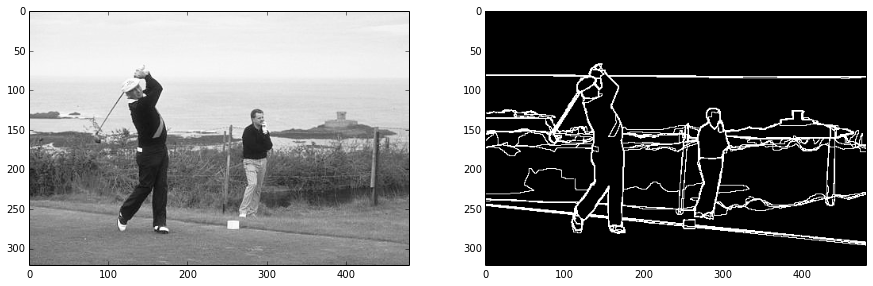

In [642]:
img2 = (io.imread('Images/Q3/Golf.jpg',dtype='float64')/255.0)
imx2 = (io.imread('Images/Q3/Golf_GT.bmp',dtype='float64'))
fig, axes = plt.subplots(nrows=1,ncols=2)
axes[0].imshow(img2,  cmap = cm.Greys_r)

axes[1].imshow(imx2,  cmap = cm.Greys_r)



plt.show()


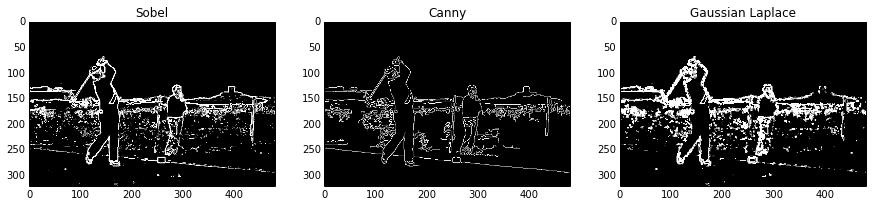

In [723]:

golf_sobel = applySobel(img2,.08038)
golf_canny = applyCanny(img2,.8151, 0.44908)
golf_laplace = applyGaussianLaplace(img2,.9143,.1099)
fig, axes = plt.subplots(nrows=1,ncols=3)
axes[0].set_title('Sobel')
axes[1].set_title('Canny')
axes[2].set_title('Gaussian Laplace')
axes[0].imshow(golf_sobel,  cmap = cm.Greys_r)

axes[1].imshow(golf_canny,  cmap = cm.Greys_r)
axes[2].imshow(golf_laplace, cmap = cm.Greys_r)

plt.show()




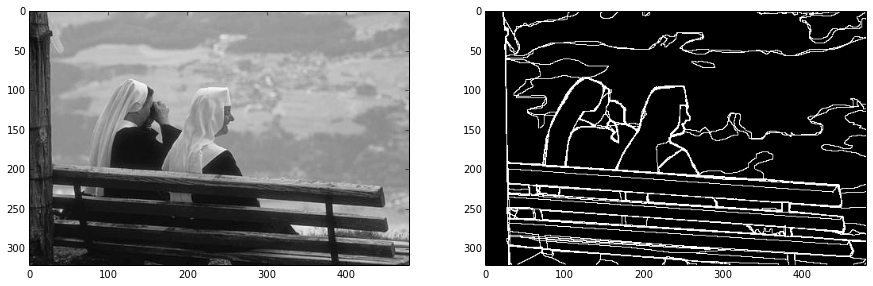

In [724]:
img3 = (io.imread('Images/Q3/Nuns.jpg',dtype='float64')/255.0)
imx3 = (io.imread('Images/Q3/Nuns_GT.bmp',dtype='float64'))
fig, axes = plt.subplots(nrows=1,ncols=2)
axes[0].imshow(img3,  cmap = cm.Greys_r)

axes[1].imshow(imx3,  cmap = cm.Greys_r)



plt.show()



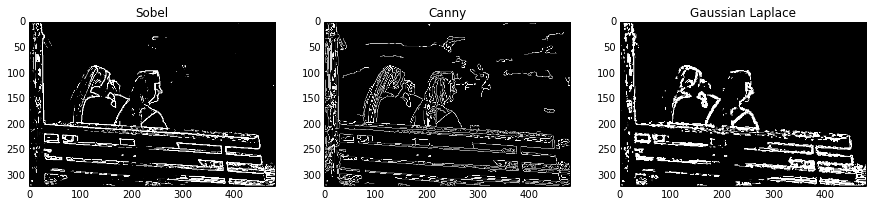

In [753]:

nuns_sobel = applySobel(img3,.059)
nuns_canny = applyCanny(img3,.5151, 0.23908)
nuns_laplace = applyGaussianLaplace(img3,.8143,.1)
fig, axes = plt.subplots(nrows=1,ncols=3)
axes[0].set_title('Sobel')
axes[1].set_title('Canny')
axes[2].set_title('Gaussian Laplace')
axes[0].imshow(nuns_sobel,  cmap = cm.Greys_r)

axes[1].imshow(nuns_canny,  cmap = cm.Greys_r)
axes[2].imshow(nuns_laplace, cmap = cm.Greys_r)

plt.show()





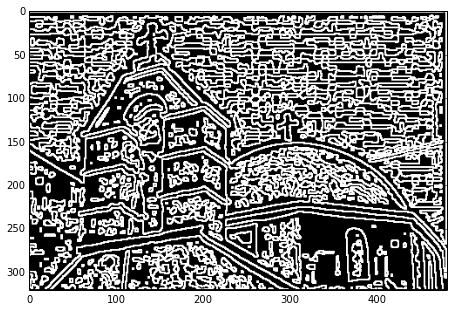

In [491]:
#For zero threshold edges are closed curves because 
edgeLap = applyGaussianLaplace(img1,2,0.0)
plt.imshow(edgeLap, cmap = cm.Greys_r)
plt.show()


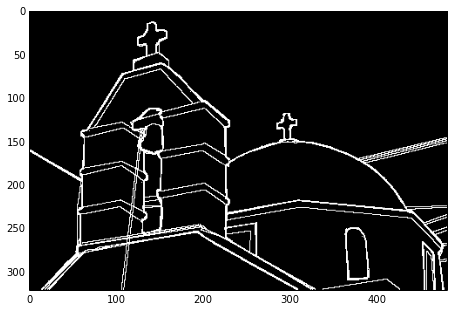

In [448]:
img1 = (io.imread('Images/Q3/Church.jpg',dtype='float64')/255.0)
imx1 = (io.imread('Images/Q3/Church_GT.bmp',dtype='float64'))
plt.imshow(imx, cmap = cm.Greys_r)
plt.show()

In [756]:
pr1_ch,r1_ch = precisionRecallCurve(img1, imx1,.75,'canny')
pr2_ch,r2_ch = precisionRecallCurve(img1, imx1,.75,'sobel')
pr3_ch,r3_ch = precisionRecallCurve(img1, imx1,.75,'glap')

0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009
0.01
0.011
0.012
0.013
0.014
0.015
0.016
0.017
0.018
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036
0.037
0.038
0.039
0.04
0.041
0.042
0.043
0.044
0.045
0.046
0.047
0.048
0.049
0.05
0.051
0.052
0.053
0.054
0.055
0.056
0.057
0.058
0.059
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.071
0.072
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.086
0.087
0.088
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.102
0.103
0.104
0.105
0.106
0.107
0.108
0.109
0.11
0.111
0.112
0.113
0.114
0.115
0.116
0.117
0.118
0.119
0.12
0.121
0.122
0.123
0.124
0.125
0.126
0.127
0.128
0.129
0.13
0.131
0.132
0.133
0.134
0.135
0.136
0.137
0.138
0.139
0.14
0.141
0.142
0.143
0.144
0.145
0.146
0.147
0.148
0.149
0.15
0.151
0.152
0.153
0.154
0.155
0.156
0.157
0.158
0.159
0.16
0.161
0.162
0.163
0.164
0.165
0.166
0.167
0.168
0.169

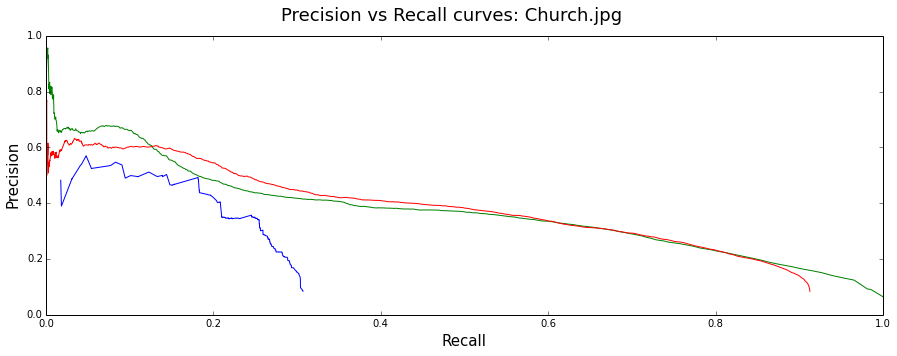

In [759]:
rcParams['figure.figsize'] = 15, 5
fig = plt.figure()

plt.plot(r1_ch,pr1_ch, 'b-')
plt.plot(r2_ch,pr2_ch, 'g-')
plt.plot(r3_ch,pr3_ch, 'r-')
fig.suptitle('Precision vs Recall curves: Church.jpg ',fontsize=18)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Recall',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()





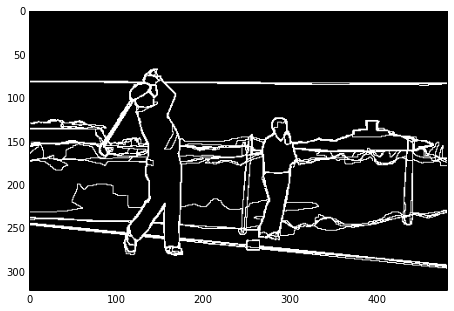

In [380]:
img2 = (io.imread('Images/Q3/Golf.jpg',dtype='float64')/255.0)

imx2 = (io.imread('Images/Q3/Golf_GT.bmp',dtype='float64'))
plt.imshow(imx2, cmap = cm.Greys_r)
plt.show()

In [757]:
pr1_golf,r1_golf = precisionRecallCurve(img2, imx2,.75,'canny')
pr2_golf,r2_golf = precisionRecallCurve(img2, imx2,.75,'sobel')
pr3_golf,r3_golf = precisionRecallCurve(img2, imx2,.75,'glap')

0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009
0.01
0.011
0.012
0.013
0.014
0.015
0.016
0.017
0.018
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036
0.037
0.038
0.039
0.04
0.041
0.042
0.043
0.044
0.045
0.046
0.047
0.048
0.049
0.05
0.051
0.052
0.053
0.054
0.055
0.056
0.057
0.058
0.059
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.071
0.072
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.086
0.087
0.088
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.102
0.103
0.104
0.105
0.106
0.107
0.108
0.109
0.11
0.111
0.112
0.113
0.114
0.115
0.116
0.117
0.118
0.119
0.12
0.121
0.122
0.123
0.124
0.125
0.126
0.127
0.128
0.129
0.13
0.131
0.132
0.133
0.134
0.135
0.136
0.137
0.138
0.139
0.14
0.141
0.142
0.143
0.144
0.145
0.146
0.147
0.148
0.149
0.15
0.151
0.152
0.153
0.154
0.155
0.156
0.157
0.158
0.159
0.16
0.161
0.162
0.163
0.164
0.165
0.166
0.167
0.168
0.169

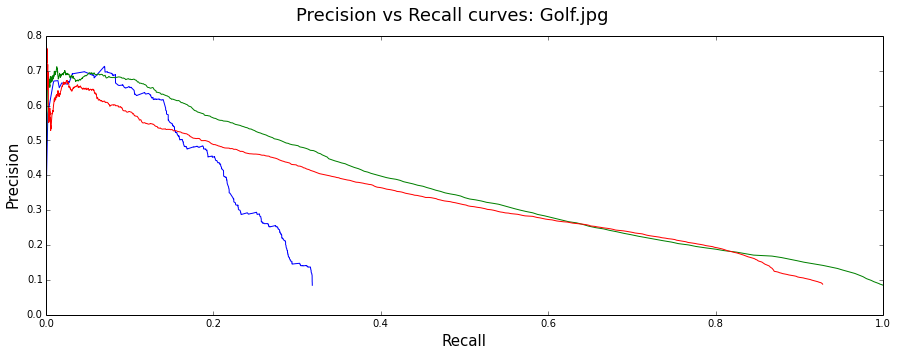

In [762]:
rcParams['figure.figsize'] = 15, 5
fig = plt.figure()

plt.plot(r1_golf,pr1_golf, 'b-')
plt.plot(r2_golf,pr2_golf, 'g-')
plt.plot(r3_golf,pr3_golf, 'r-')
fig.suptitle('Precision vs Recall curves: Golf.jpg ',fontsize=18)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Recall',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()






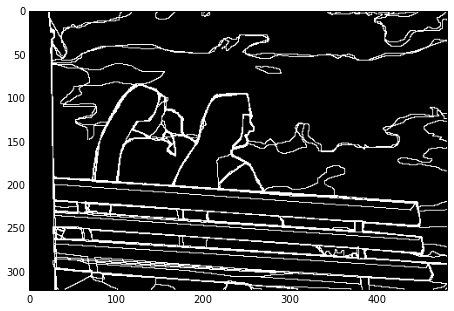

In [763]:
img3 = (io.imread('Images/Q3/Nuns.jpg',dtype='float64')/255.0)

imx3 = (io.imread('Images/Q3/Nuns_GT.bmp',dtype='float64'))
plt.imshow(imx3, cmap = cm.Greys_r)
plt.show()

In [764]:
pr1_nuns,r1_nuns = precisionRecallCurve(img3, imx3,.75,'canny')
pr2_nuns,r2_nuns = precisionRecallCurve(img3, imx3,.75,'sobel')
pr3_nuns,r3_nuns = precisionRecallCurve(img3, imx3,.75,'glap')

0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009
0.01
0.011
0.012
0.013
0.014
0.015
0.016
0.017
0.018
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036
0.037
0.038
0.039
0.04
0.041
0.042
0.043
0.044
0.045
0.046
0.047
0.048
0.049
0.05
0.051
0.052
0.053
0.054
0.055
0.056
0.057
0.058
0.059
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.071
0.072
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.086
0.087
0.088
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.102
0.103
0.104
0.105
0.106
0.107
0.108
0.109
0.11
0.111
0.112
0.113
0.114
0.115
0.116
0.117
0.118
0.119
0.12
0.121
0.122
0.123
0.124
0.125
0.126
0.127
0.128
0.129
0.13
0.131
0.132
0.133
0.134
0.135
0.136
0.137
0.138
0.139
0.14
0.141
0.142
0.143
0.144
0.145
0.146
0.147
0.148
0.149
0.15
0.151
0.152
0.153
0.154
0.155
0.156
0.157
0.158
0.159
0.16
0.161
0.162
0.163
0.164
0.165
0.166
0.167
0.168
0.169

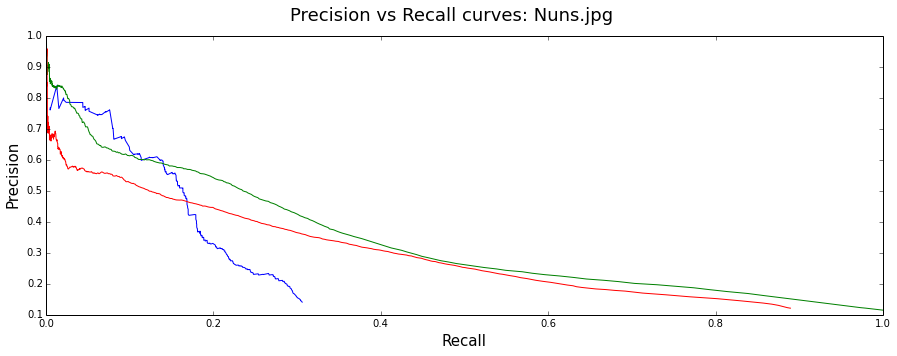

In [765]:
rcParams['figure.figsize'] = 15, 5
fig = plt.figure()

plt.plot(r1_nuns,pr1_nuns, 'b-')
plt.plot(r2_nuns,pr2_nuns, 'g-')
plt.plot(r3_nuns,pr3_nuns, 'r-')
fig.suptitle('Precision vs Recall curves: Nuns.jpg ',fontsize=18)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Recall',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()







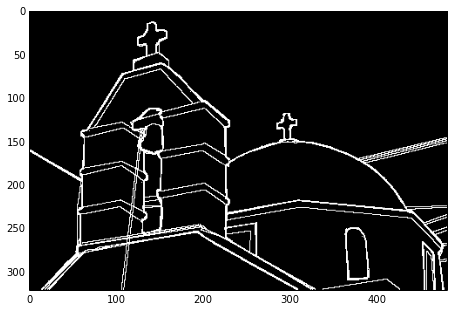

In [768]:
img1 = (io.imread('Images/Q3/Church.jpg',dtype='float64')/255.0)
imx1 = (io.imread('Images/Q3/Church_GT.bmp',dtype='float64'))
plt.imshow(imx, cmap = cm.Greys_r)
plt.show()

In [770]:
pr1_ch3p,r1_ch3p = precisionRecallCurve3Pixel(img1, imx1,.75,'canny')
pr2_ch3p,r2_ch3p = precisionRecallCurve3Pixel(img1, imx1,.75,'sobel')
pr3_ch3p,r3_ch3p = precisionRecallCurve3Pixel(img1, imx1,.75,'glap')

0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009
0.01
0.011
0.012
0.013
0.014
0.015
0.016
0.017
0.018
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036
0.037
0.038
0.039
0.04
0.041
0.042
0.043
0.044
0.045
0.046
0.047
0.048
0.049
0.05
0.051
0.052
0.053
0.054
0.055
0.056
0.057
0.058
0.059
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.071
0.072
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.086
0.087
0.088
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.102
0.103
0.104
0.105
0.106
0.107
0.108
0.109
0.11
0.111
0.112
0.113
0.114
0.115
0.116
0.117
0.118
0.119
0.12
0.121
0.122
0.123
0.124
0.125
0.126
0.127
0.128
0.129
0.13
0.131
0.132
0.133
0.134
0.135
0.136
0.137
0.138
0.139
0.14
0.141
0.142
0.143
0.144
0.145
0.146
0.147
0.148
0.149
0.15
0.151
0.152
0.153
0.154
0.155
0.156
0.157
0.158
0.159
0.16
0.161
0.162
0.163
0.164
0.165
0.166
0.167
0.168
0.169

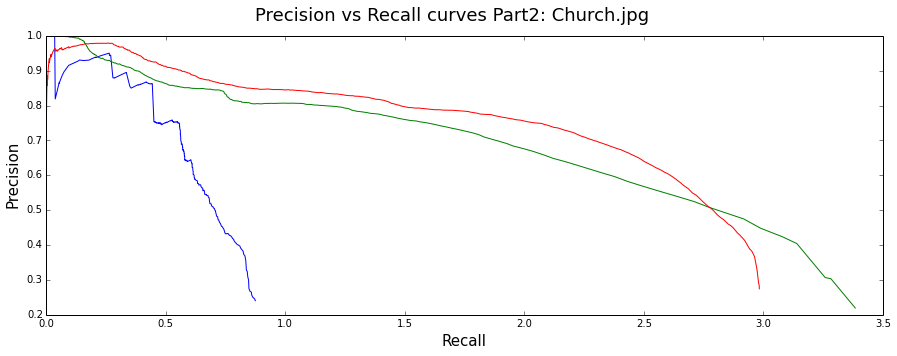

In [771]:
rcParams['figure.figsize'] = 15, 5
fig = plt.figure()

plt.plot(r1_ch3p,pr1_ch3p, 'b-')
plt.plot(r2_ch3p,pr2_ch3p, 'g-')
plt.plot(r3_ch3p,pr3_ch3p, 'r-')
fig.suptitle('Precision vs Recall curves Part2: Church.jpg ',fontsize=18)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Recall',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()








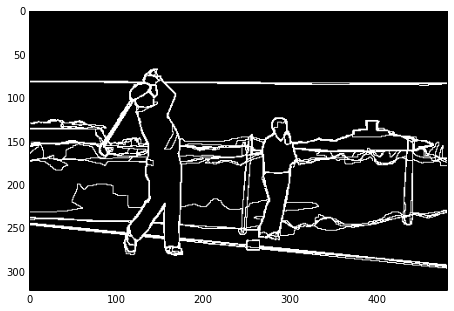

In [441]:
img2 = (io.imread('Images/Q3/Golf.jpg',dtype='float64')/255.0)

imx2 = (io.imread('Images/Q3/Golf_GT.bmp',dtype='float64'))
plt.imshow(imx2, cmap = cm.Greys_r)
plt.show()

In [442]:
pr1_golf3p,r1_golf3p = precisionRecallCurve3Pixel(img2, imx2,.75,'canny')
pr2_golf3p,r2_golf3p = precisionRecallCurve3Pixel(img2, imx2,.75,'sobel')
pr3_golf3p,r3_golf3p = precisionRecallCurve3Pixel(img2, imx2,.75,'glap')

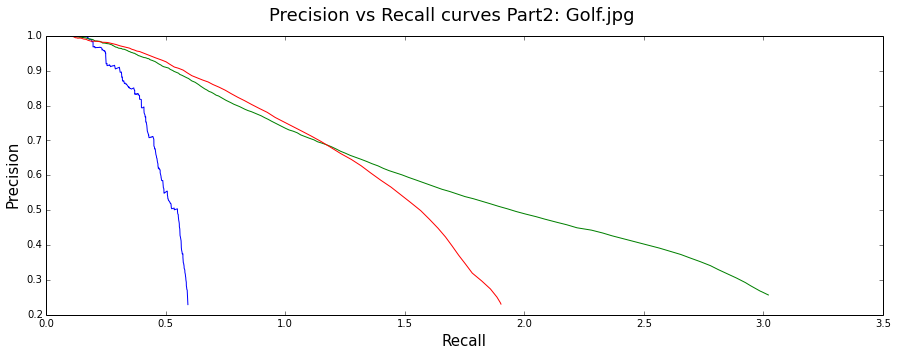

In [767]:
rcParams['figure.figsize'] = 15, 5
fig = plt.figure()

plt.plot(r1_golf3p,pr1_golf3p, 'b-')
plt.plot(r2_golf3p,pr2_golf3p, 'g-')
plt.plot(r3_golf3p,pr3_golf3p, 'r-')
fig.suptitle('Precision vs Recall curves Part2: Golf.jpg ',fontsize=18)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Recall',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()









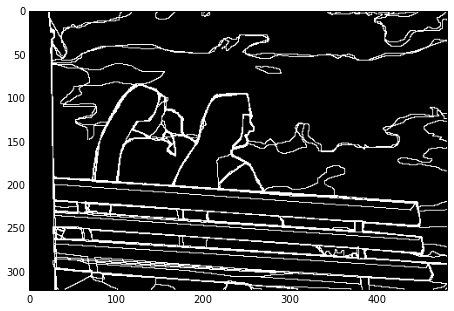

In [445]:
img3 = (io.imread('Images/Q3/Nuns.jpg',dtype='float64')/255.0)

imx3 = (io.imread('Images/Q3/Nuns_GT.bmp',dtype='float64'))
plt.imshow(imx3, cmap = cm.Greys_r)
plt.show()

In [446]:
pr1_nuns3p,r1_nuns3p = precisionRecallCurve3Pixel(img3, imx3,1.5,'canny')
pr2_nuns3p,r2_nuns3p = precisionRecallCurve3Pixel(img3, imx3,1.5,'sobel')
pr3_nuns3p,r3_nuns3p = precisionRecallCurve3Pixel(img3, imx3,1.5,'glap')

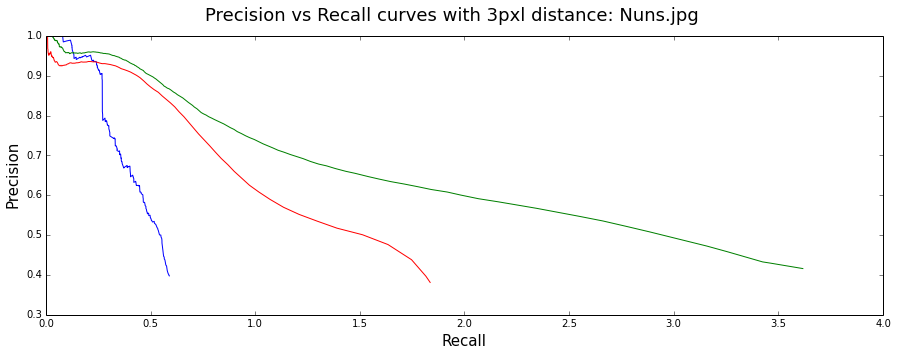

In [464]:
rcParams['figure.figsize'] = 15, 5
fig = plt.figure()

plt.plot(r1_nuns3p,pr1_nuns3p, 'b-')
plt.plot(r2_nuns3p,pr2_nuns3p, 'g-')
plt.plot(r3_nuns3p,pr3_nuns3p, 'r-')
fig.suptitle('Precision vs Recall curves with 3pxl distance: Nuns.jpg ',fontsize=18)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Recall',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()




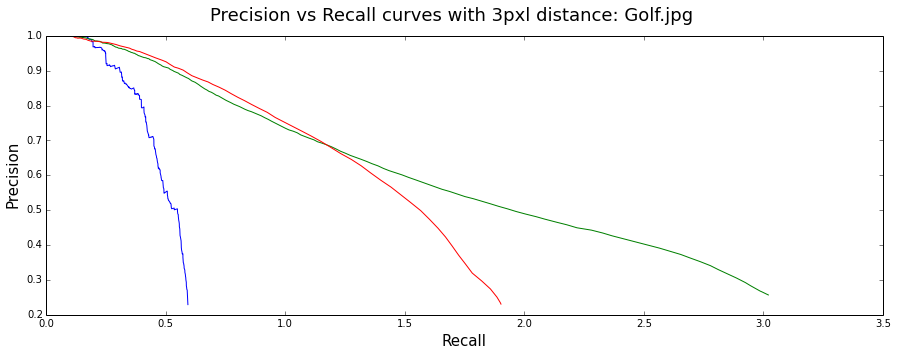

In [462]:
rcParams['figure.figsize'] = 15, 5
fig = plt.figure()

plt.plot(r1_golf3p,pr1_golf3p, 'b-')
plt.plot(r2_golf3p,pr2_golf3p, 'g-')
plt.plot(r3_golf3p,pr3_golf3p, 'r-')
fig.suptitle('Precision vs Recall curves with 3pxl distance: Golf.jpg ',fontsize=18)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Recall',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()



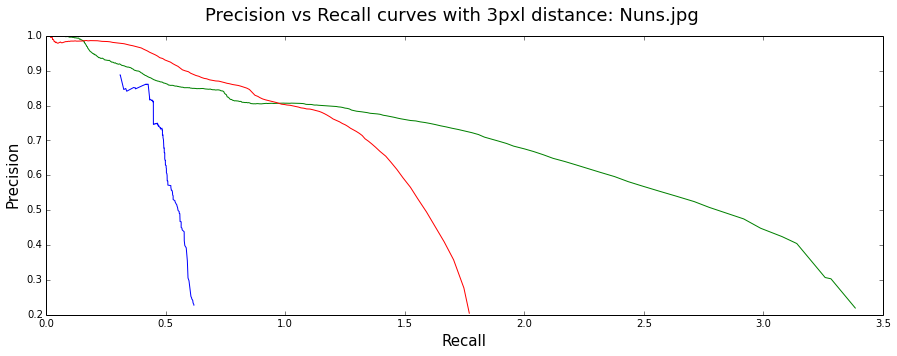

In [460]:
rcParams['figure.figsize'] = 15, 5
fig = plt.figure()

plt.plot(r1_ch3p, pr1_ch3p, 'b-')
plt.plot(r2_ch3p, pr2_ch3p, 'g-')
plt.plot(r3_ch3p, pr3_ch3p, 'r-')
fig.suptitle('Precision vs Recall curves with 3pxl distance: Church.jpg ',fontsize=18)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Recall',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()






In [456]:
ax = plt.axes

In [457]:
ax

<function matplotlib.pyplot.axes>

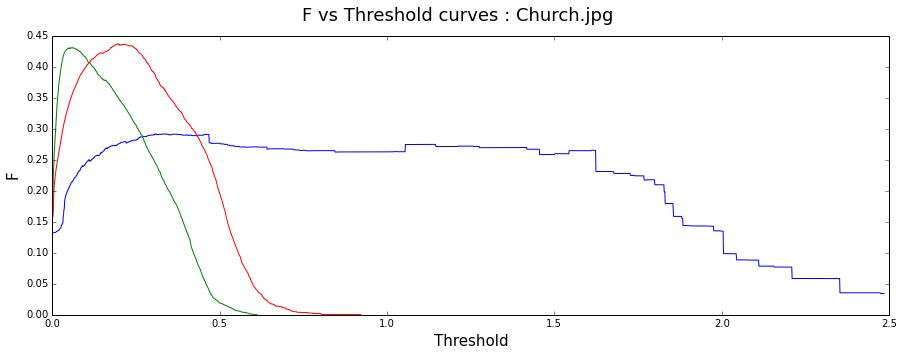

In [800]:
##Plotting F curve
#church
F1_ch = [(2*r*p)/(p+r) for r,p in zip(r1_ch,pr1_ch) if(p+r!=0)]
thr1_ch = [i*.001 for i in range(len(F1_ch))]
F2_ch = [(2*r*p)/(p+r) for r,p in zip(r2_ch,pr2_ch) if(p+r!=0)]
thr2_ch = [i*.001 for i in range(len(F2_ch))]



F3_ch = [(2*r*p)/(p+r) for r,p in zip(r3_ch,pr3_ch) if(p+r!=0)]
thr3_ch = [.001*i for i in range(len(F3_ch))]


rcParams['figure.figsize'] = 15, 5

fig = plt.figure()

plt.plot(thr1_ch,F1_ch, 'b-')
plt.plot(thr2_ch,F2_ch, 'g-')
plt.plot(thr3_ch,F3_ch, 'r-')
fig.suptitle('F vs Threshold curves : Church.jpg ',fontsize=18)
plt.ylabel('F',fontsize=15)
plt.xlabel('Threshold',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()




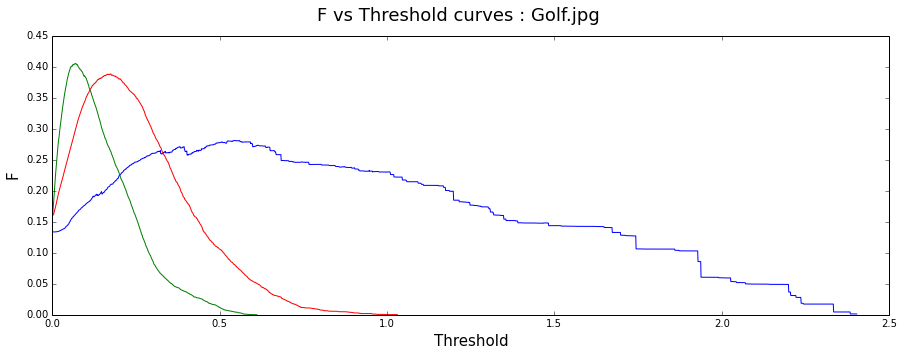

In [797]:
##Plotting F curve
#church
F1_golf = [(2*r*p)/(p+r) for r,p in zip(r1_golf,pr1_golf) if(p+r!=0)]
thr1_golf = [i*.001 for i in range(len(F1_golf))]
F2_golf = [(2*r*p)/(p+r) for r,p in zip(r2_golf,pr2_golf) if(p+r!=0)]
thr2_golf = [i*.001 for i in range(len(F2_golf))]



F3_golf = [(2*r*p)/(p+r) for r,p in zip(r3_golf,pr3_golf) if(p+r!=0)]
thr3_golf = [.001*i for i in range(len(F3_golf))]


rcParams['figure.figsize'] = 15, 5

fig = plt.figure()

plt.plot(thr1_golf,F1_golf, 'b-')
plt.plot(thr2_golf,F2_golf, 'g-')
plt.plot(thr3_golf,F3_golf, 'r-')
fig.suptitle('F vs Threshold curves : Golf.jpg ',fontsize=18)
plt.ylabel('F',fontsize=15)
plt.xlabel('Threshold',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()





In [785]:
len(F1_ch)

2486

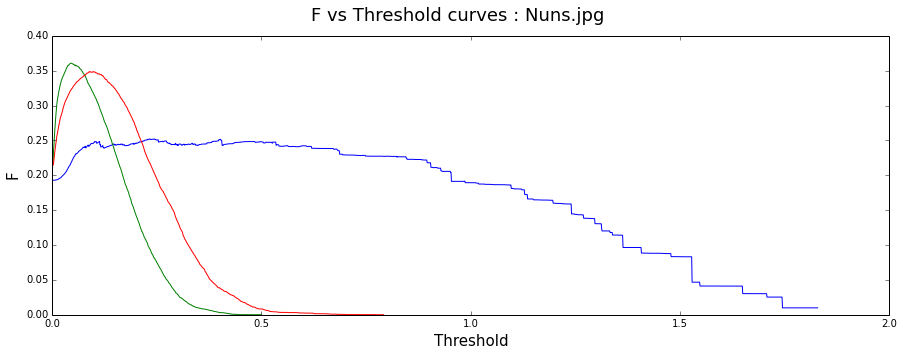

In [798]:
##Plotting F curve
#church
F1_nuns = [(2*r*p)/(p+r) for r,p in zip(r1_nuns,pr1_nuns) if(p+r!=0)]
thr1_nuns = [i*.001 for i in range(len(F1_nuns))]
F2_nuns = [(2*r*p)/(p+r) for r,p in zip(r2_nuns,pr2_nuns) if(p+r!=0)]
thr2_nuns = [i*.001 for i in range(len(F2_nuns))]



F3_nuns = [(2*r*p)/(p+r) for r,p in zip(r3_nuns,pr3_nuns) if(p+r!=0)]
thr3_nuns = [.001*i for i in range(len(F3_nuns))]


rcParams['figure.figsize'] = 15, 5

fig = plt.figure()

plt.plot(thr1_nuns,F1_nuns, 'b-')
plt.plot(thr2_nuns,F2_nuns, 'g-')
plt.plot(thr3_nuns,F3_nuns, 'r-')
fig.suptitle('F vs Threshold curves : Nuns.jpg ',fontsize=18)
plt.ylabel('F',fontsize=15)
plt.xlabel('Threshold',fontsize=15)
# ax1.set_title('Canny')
# ax2.set_title('Sobel')
# ax3.set_title('Gaussian Laplace')

plt.show()